# Статистический анализ и прогнозирование рынка ценных бумаг в России

## 1. Технический анализ

In [18]:
# Модули для обработки данных
import numpy as np
import pandas as pd
from datetime import date
# Визуализация
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from finam import Timeframe  # Разные таймфреймы
from data_preprocessing import Data  # Подготовка данных

In [2]:
# Конфигурирование отображения данных
pd.options.display.max_rows = 10
pd.options.display.precision = 2
pd.options.plotting.backend = "plotly"

### Moving Average Convergence/Divergence

Индикатор используется для проверки силы и направления тренда, а также для определения разворотных точек. Строится на основе скользящих средних.

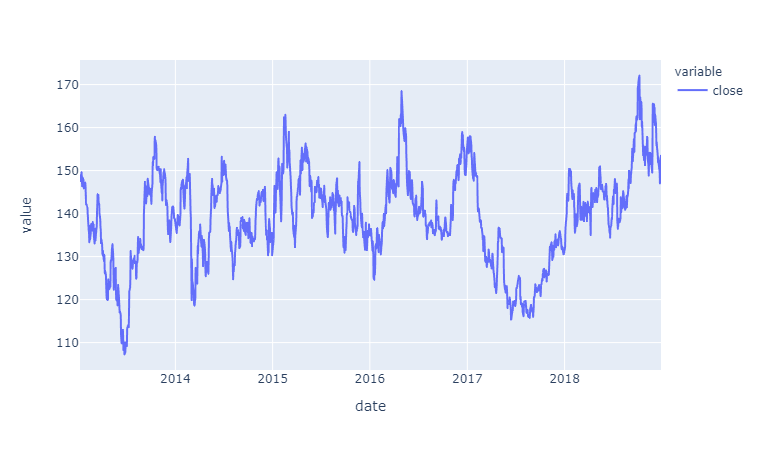

In [58]:
# Газпром, дневной таймфейм, цены закрытия с 01.01.2013 по 01.01.2019.
gazp_daily = Data('GAZP', timeframe=Timeframe.DAILY,
                  start_date=date(2013, 1, 1), end_date=date(2019, 1, 1)
                  ).download()['close'].to_frame()
gazp_daily.plot()

In [59]:
# Рассчитываем экспоненциальные скользаящие средние
gazp_daily['macd_slow'] = gazp_daily['close'].ewm(span=26, adjust=False).mean()
gazp_daily['macd_fast'] = gazp_daily['close'].ewm(span=12, adjust=False).mean()
gazp_daily['macd'] = gazp_daily['macd_fast'] - gazp_daily['macd_slow']
gazp_daily['macd_signal'] = gazp_daily['macd'].ewm(span=9, adjust=False).mean()
gazp_daily['macd_hist'] = gazp_daily['macd'] - gazp_daily['macd_signal']

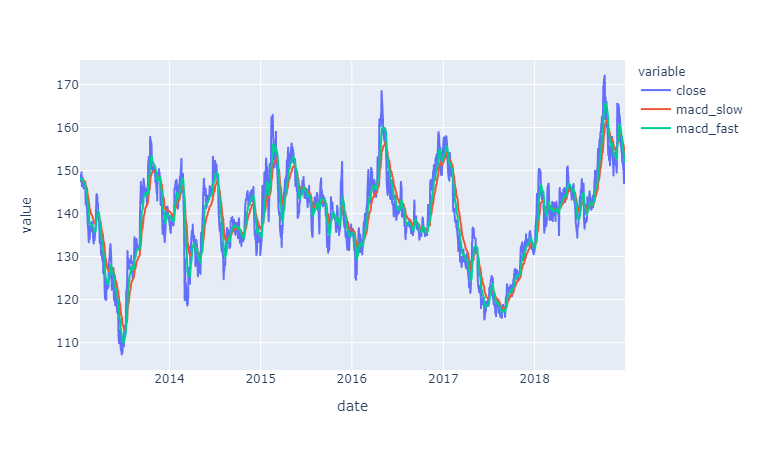

In [61]:
# Отображаем результаты на графике
fig = px.line(gazp_daily,
              x=gazp_daily.index,
              y=['close', 'macd_slow', 'macd_fast'])

fig.show()

Когда короткая средняя пересекает длинную снизу, то это - сигнал к покупке. А когда она пересакает ее снизу - сигнал к продаже.

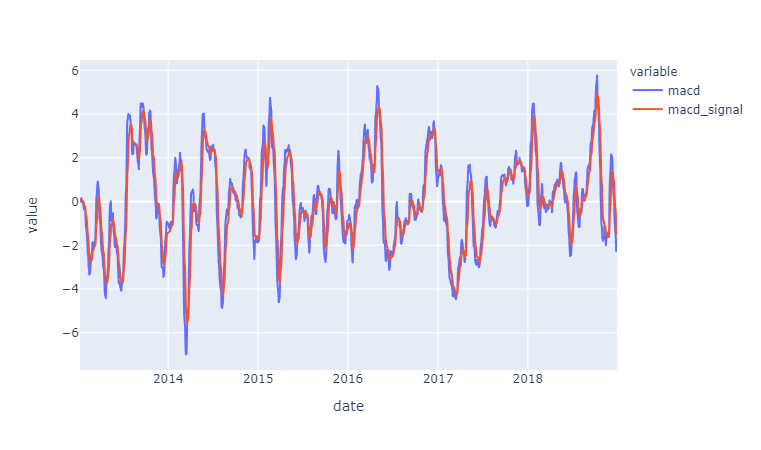

In [62]:
fig = px.line(gazp_daily, x=gazp_daily.index, y=['macd', 'macd_signal'])
fig.show()

Когда линия macd перескает сигнальную линию снизу, то это - сигнал к покупке, а когда сверху - к продаже.

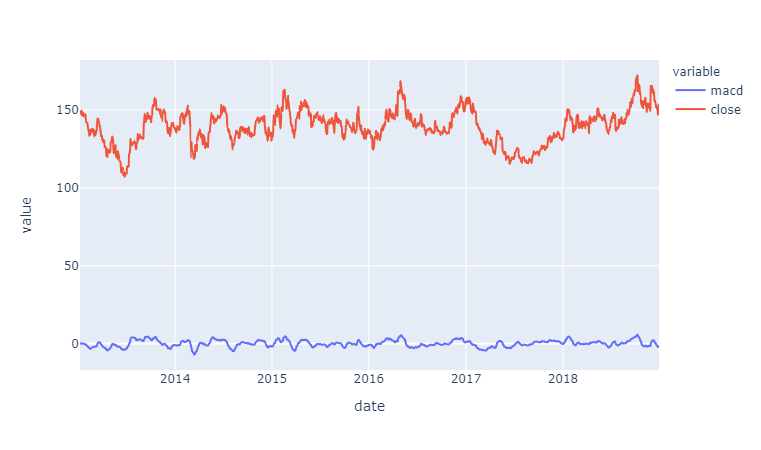

In [63]:
fig = px.line(gazp_daily, x=gazp_daily.index, y=['macd', 'close'])
fig.show()

В определенные моменты кривая macd является более крутой, чем в другие моменты. Это случаи перекупленности и перепроданности.

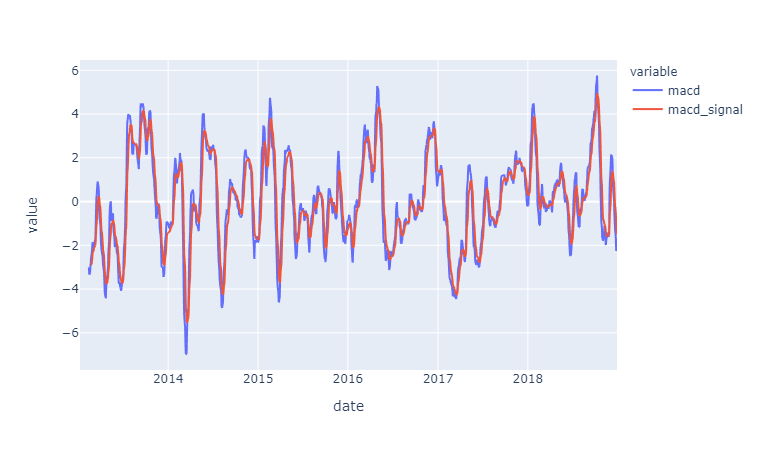

In [64]:
# Импортируем готовую функцию для расчета MACD
from ta.trend import MACD

gazp_macd = MACD(gazp_daily.close)
auto_macd = pd.DataFrame(data={'macd': gazp_macd.macd(),
                               'macd_diff': gazp_macd.macd_diff(),
                               'macd_signal': gazp_macd.macd_signal()
                               })

# Графики должны быть аналогичны
fig = px.line(auto_macd, x=auto_macd.index, y=['macd', 'macd_signal'])
fig.show()

In [ ]:
# Протестируем индикатор на исторических данных
